# Transforming Data With Pandas

#### 1. Introduction

In this mission, we'll continue working with the  [World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness)  and explore another aspect of it that we haven't analyzed yet - the factors that contribute happiness. As a reminder, the World Happiness Report assigns each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10.

You may recall from previous missions that each of the columns below contains the estimated extent to which each factor contributes to the happiness score:

-   `Economy (GDP per Capita)`
-   `Family`
-   `Health (Life Expectancy)`
-   `Freedom`
-   `Trust (Government Corruption)`
-   `Generosity`

Throughout this mission, we'll refer to the columns above as the "factor" columns. We'll work to answer the following question in this mission:

_Which of the factors above contribute the most to the happiness score?_

However, in order to answer this question, we need to manipulate our data into a format that makes it easier to analyze. We'll explore the following functions and methods to perform this task:

-   `Series.map()`
-   `Series.apply()`
-   `DataFrame.applymap()`
-   `DataFrame.apply()`
-   `pd.melt()`


For teaching purposes, we'll focus just on the 2015 report in this mission. As a reminder, below are the first five rows of the data set:
![Data description](./description_data_1.JPG)


Below are descriptions for some of the other columns we'll work with in this mission:

-   `Country`  - Name of the country
-   `Region`  - Name of the region the country belongs to
-   `Happiness Rank`  - The rank of the country, as determined by its happiness score
-   `Happiness Score`  - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10
-   `Dystopia Residual`- Represents the extent to which the factors above over or under explain the happiness score. Don't worry too much about this column - you won't need in depth knowledge of it to complete this mission.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
happiness2015 = pd.read_csv('World_Happiness_2015.csv')
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


**Instructions**

Recall that the 2015 World Happiness Report is saved to a variable named  `happiness2015`. We also created a dictionary named  `mapping`  for renaming columns.

-   Use the  [`DataFrame.rename()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)  method to change the  `'Economy (GDP per Capita)'`,  `'Health (Life Expectancy)'`, and  `'Trust (Government Corruption)'`  column names to the names specified in the  `mapping`  dictionary.
    -   Pass the  `mapping`  dictionary into the  `df.rename()`  method and set the  `axis`  parameter to  `1`.
    -   Assign the result back to  `happiness2015`.


In [3]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }

In [4]:
happiness2015 = happiness2015.rename(mapping, axis=1)
happiness2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


#### 2. Apply a Function Element-wise Using the Map and Apply Methods 

In [5]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

**Instructions**

-   Use the  `Series.map()`  method to apply the  `label`  function to the  `Economy`  column in  `happiness2015`. Assign the result to  `economy_impact_map`.
-   Use the  `Series.apply()`  method to apply the function to the  `Economy`  column. Assign the result to  `economy_impact_apply`.
-   Use the following code to check if the methods produce the same result:  `economy_impact_map.equals(economy_impact_apply)`. Assign the result to a variable named  `equal`.


In [6]:
economy_impact_map = happiness2015['Economy'].map(label)
economy_impact_map

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [7]:
economy_impact_apply = happiness2015['Economy'].apply(label)
economy_impact_apply

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [8]:
equal = economy_impact_map.equals(economy_impact_apply)
equal

True

### 3. Apply a Function Element-wise Using the Map and Apply Methods Continued

In [9]:
happiness2015['Economy Impact'] = happiness2015['Economy'].map(label)

**Instructions**
-   Update  `label`  to take in another argument named  `x`. If the  `element`  is greater than  `x`, return 'High'. Otherwise, return 'Low'.
-   Then, use the  `apply`  method to apply  `label`  to the  `Economy`  column and set the  `x`  argument to  `0.8`. Save the result back to  `economy_impact_apply`.


In [10]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'

In [11]:
economy_impact_apply = happiness2015['Economy'].apply(label, x=0.8)
economy_impact_apply

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

### 4. Apply a Function Element-wise to Multiple Columns Using Applymap Method

In [12]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

**Instructions**

We've already created a list named  `factors`  containing the column names for the six factors that contribute to the happiness score.

-   Use the  `df.applymap()`  method to apply the  `label`  function to the columns saved in  `factors`  in  `happiness2015`. Assign the result to  `factors_impact`.


In [13]:
factors_impact = happiness2015[factors].applymap(label)
factors_impact

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low
...,...,...,...,...,...,...
153,Low,Low,Low,Low,Low,Low
154,Low,Low,Low,Low,Low,Low
155,Low,Low,Low,Low,Low,Low
156,Low,Low,Low,Low,Low,Low


### 5. Apply Functions along an Axis using the Apply Method

**Instructions**

-   Create a function that calculates the percentage of 'High' and 'Low' values in each column.
    -   Create a function named  `v_counts`  that accepts one parameter called  `col`.
    -   Use the  `Series.value_counts()`  method to calculate the value counts for  `col`. Assign the result to  `num`.
    -   Use the  [`Series.size`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.size.html)  attribute to calculate the number of rows in the column. Assign the result to  `den`.
    -   Divide  `num`  by  `den`  and return the result.
-   Use the  `df.apply()`  method to apply the  `v_counts`  function to all of the columns in  `factors_impact`. Assign the result to  `v_counts_pct`.


In [14]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den

v_counts_pct = factors_impact.apply(v_counts)

In [15]:
v_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


### 6. Apply Functions along an Axis using the Apply Method Continued

**Instructions**

-   Create a function that converts each of the six factor columns and the  `Dystopia Residual`  column to percentages.
    -   Create a function named  `percentages`  that accepts one parameter called  `col`.
    -   Divide  `col`  by the  `Happiness Score`  column. Assign the result to  `div`.
    -   Multiply  `div`  by 100 and return the result.
-   Use the  `df.apply()`  method to apply the  `percentages`  function to all of the columns in  `factors`. Assign the result to  `factor_percentages`.


In [16]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col):
    div = col / happiness2015['Happiness Score']
    return div * 100

factor_percentages = happiness2015[factors].apply(percentages)

In [17]:
factor_percentages

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445
...,...,...,...,...,...,...,...
153,6.409235,22.329004,12.370563,17.085426,15.928139,6.530447,19.348341
154,8.582335,10.594611,9.553892,14.505988,2.398204,5.467066,48.900599
155,22.062542,15.798071,24.016301,5.217565,6.289421,15.694943,10.930805
156,0.526678,14.315663,7.709466,4.079174,3.463683,6.790706,63.098795


### 7. Reshaping Data with the Melt Function

**Instructions**

-   Use the  `melt`  function to reshape  `happiness2015`. The columns listed in  `main_cols`  should stay the same. The columns listed in  `factors`  should be transformed into rows. Assign the result to a variable called  `melt`.
-   Convert the  `value`  column to a percentage.
    -   Divide the  `value`  column by the  `Happiness Score`  column and multiply the result by  `100`.
    -   Use the  [`round()`  function](https://docs.python.org/3/library/functions.html#round)  to round the result to 2 decimal places.
    -   Assign the result to a new column called  `Percentage`.


In [18]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

In [19]:
melt = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)
melt['Percentage'] = round((melt['value'] / happiness2015['Happiness Score']) * 100, 2)


In [20]:
melt['Percentage']

0       18.41
1       17.22
2       17.61
3       19.40
4       17.86
        ...  
1101      NaN
1102      NaN
1103      NaN
1104      NaN
1105      NaN
Name: Percentage, Length: 1106, dtype: float64

### 8. Challenge: Aggregate the Data and Create a Visualization

**Instructions**

-   Use the  `df.pivot_table()`  method to create a pivot table from the  `melt`  dataframe. Set the  `variable`  column as the  `index`  and the  `value`  column as the  `values`. Assign the result to  `pv_melt`.
-   Use the  `df.plot()`  method to create a pie chart of the results. Set the  `kind`  parameter to  `'pie'`, the  `y`  parameter to  `'value'`, and the  `legend`  parameter to  `False`, so we can better see the results.
-   If we disregard  `Dystopia Residual`, which two factors, on average, contribute the most to the happiness score?


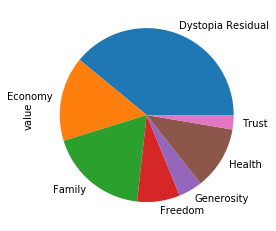

In [21]:
melt = pd.melt(happiness2015, id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], value_vars= ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)
pv_melt = melt.pivot_table(index='variable', values='value')
pv_melt.plot(kind='pie', y='value', legend=False)